In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/playground-series-s5e3/train.csv')

print(df.shape)

(2190, 13)


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('rainfall', axis=1)
y = df['rainfall']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print(X_train.shape)
print(X_test.shape)

df_train = X_train.merge(y_train, left_index=True, right_index=True)
df_test = X_test.merge(y_test, left_index=True, right_index=True)


(1752, 12)
(438, 12)


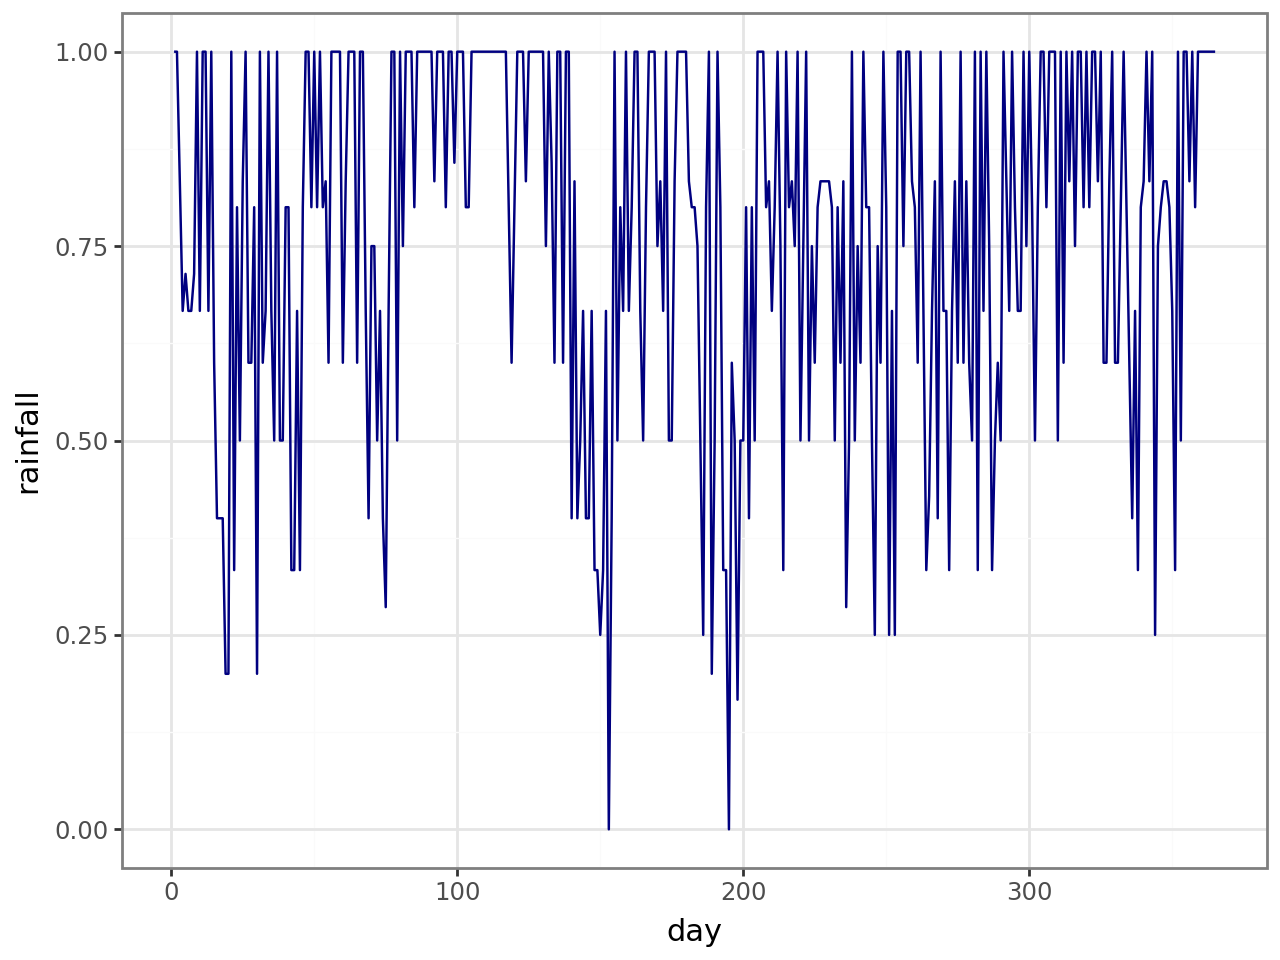

In [4]:
from plotnine import ggplot, aes, geom_line, theme_bw

rainfall_day_agg = (
    df_train
    .groupby('day', as_index=False)
    .agg({'rainfall': 'mean'})
)

(
    ggplot(rainfall_day_agg)
    + aes(x='day', y='rainfall')
    + geom_line(color='navy')
    + theme_bw()
)


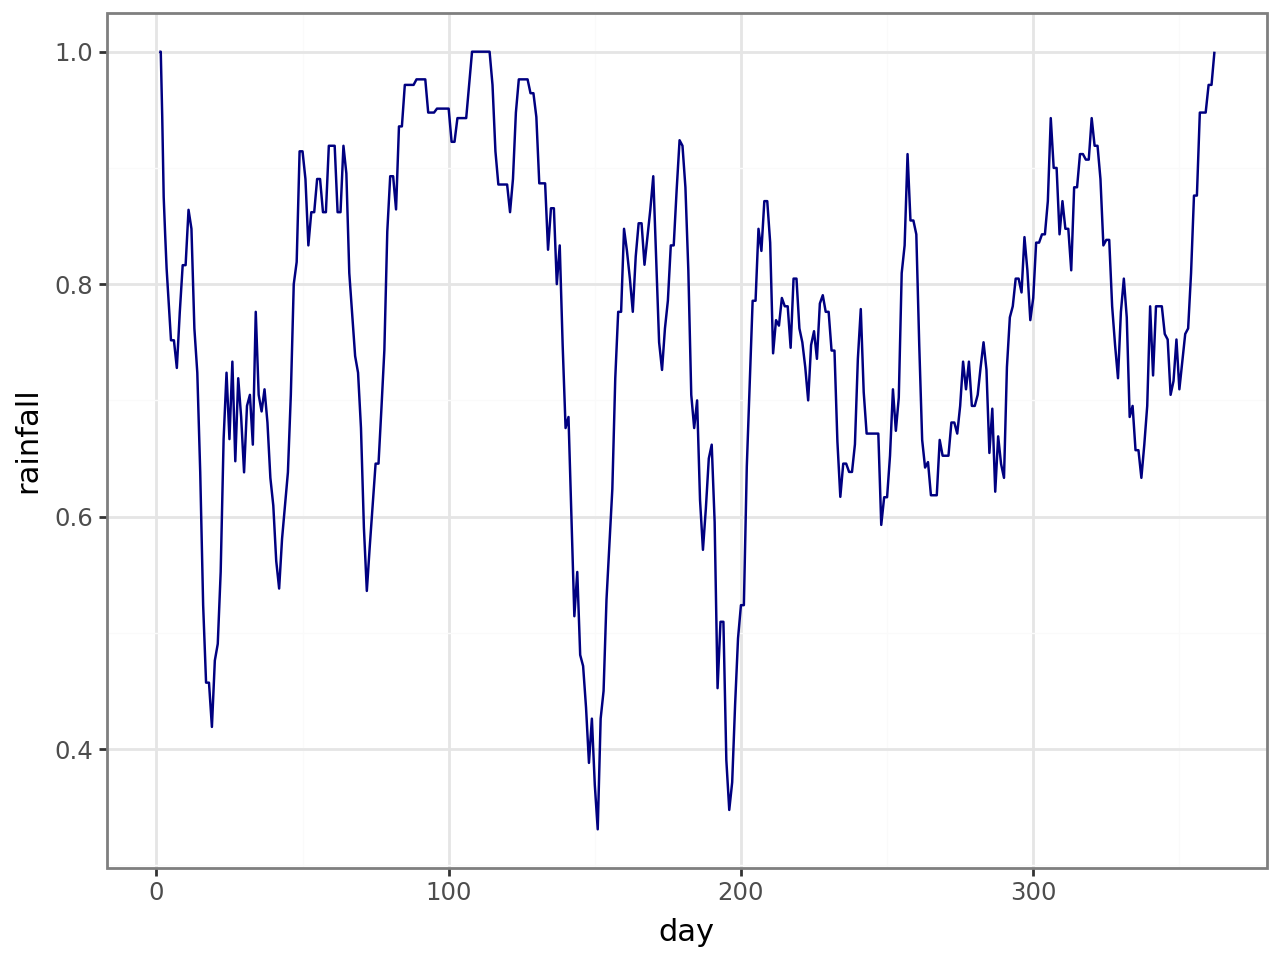

In [7]:
def rolling_average(df, x, y, window = 7):
    rolling_avg = (
        df
        .groupby(x, as_index=False)
        .agg({y: 'mean'})
        .rolling(window=window, min_periods=1).mean()
    )

    return rolling_avg

rainfall_day_agg = rolling_average(df_train, 'day', 'rainfall', window=7)

(
    ggplot(rainfall_day_agg)
    + aes(x='day', y='rainfall')
    + geom_line(color='navy')
    + theme_bw()
)